In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [3]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=[None, 5])
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [7]:
# layer.variables
# x * w + b
layer.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 0.2133239 , -0.19240446,  0.19820555,  0.20316713,  0.10902579,
         -0.23679228,  0.07624881,  0.185335  ,  0.22776116, -0.23059395,
         -0.23103987,  0.00399624, -0.22992799, -0.1199474 ,  0.1200106 ,
         -0.165461  , -0.00381915,  0.06670602, -0.02617913,  0.00659665,
          0.05440591,  0.23702584,  0.22699873, -0.13313682,  0.22823982,
          0.1258363 ,  0.17022447, -0.01152591, -0.23829912, -0.04966518,
         -0.18049414,  0.06796642,  0.06761028,  0.05168141, -0.20216542,
         -0.04308969,  0.13423987,  0.16210555,  0.07746212,  0.00952922,
         -0.08487543, -0.21563838, -0.08766221,  0.23360832, -0.03040563,
         -0.13138664,  0.11682557,  0.14885668, -0.01864506,  0.03523009,
          0.1892037 ,  0.19009672,  0.23335971, -0.05275649,  0.05901141,
         -0.2355394 ,  0.10987253,  0.16206656, -0.04343785, -0.06888172,
          0.04360045, -0.05986613,  0.0499

In [8]:
help(layer)

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size

In [9]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


(20640, 8)
(20640,)


In [10]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [14]:
# tf.nn.softplus: log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [16]:
# customized dense layer.
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建所需要的参数"""
        # x * w + b. input_shape:[None, a] [a, b] output_shape:[None, b]
        self.kernel = self.add_weight(name = 'kernel',
                                     shape = (input_shape[1], self.units),
                                     initializer = 'uniform',
                                     trainable = True)
        self.bias = self.add_weight(name = 'bias',
                                   shape = (self.units,),
                                   initializer = 'zeros',
                                   trainable = True)
        super(CustomizedDenseLayer, self).build(input_shape)
    
    def call(self, x):
        """完成正向计算"""
        return self.activation(x @ self.kernel + self.bias)

model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu', input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus,
    # keras.layers.Dense(1, activation="softplus")
    # keras.layers.Dense(1), keras.layers.Activation('softplus'),
    
])
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_4 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_5 (Cu (None, 1)                 31        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid), epochs=100, callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 58us/sample - loss: 1.2250 - val_loss: 0.6734
Epoch 2/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5942 - val_loss: 0.5790
Epoch 3/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5227 - val_loss: 0.5078
Epoch 4/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4810 - val_loss: 0.4743
Epoch 5/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4617 - val_loss: 0.4979
Epoch 6/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4656 - val_loss: 0.4418
Epoch 7/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4392 - val_loss: 0.4397
Epoch 8/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4319 - val_loss: 0.4332
Epoch 9/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.440

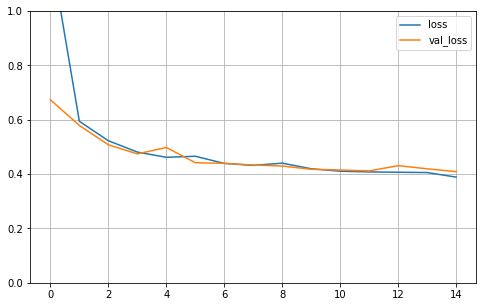

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [19]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.4292


0.4292053958242254